In [2]:
#1
tree={'S':[['A',1],['B',2]],'A':[['E',13]],'B':[['E',5]]}
heuristic={'S':5,'A':4,'B':5,'E':0}
cost={'S':0}
def AStarsearch():
    global tree,heuristic
    closed=[]
    opened=[['S',0]]
    #find the visited nodes
    
    while True:
        fn=[i[1] for i in opened]
        chosen_index=fn.index(min(fn))                                         
        node=opened[chosen_index][0]
        closed.append(opened[chosen_index])
        del opened[chosen_index]
        if closed[-1][0]=='E':
            break
        for item in tree[node]:
            if item[0] in [closed_item[0] for closed_item in closed]:
                continue
            cost.update({item[0]:cost[node]+item[1]})
            fn_node=cost[node]+heuristic[item[0]]+item[1]
            temp=[item[0],fn_node]
            opened.append(temp)
    #find optimal sequence
    trace_node='E'
    optimal_sequence=['E']
    for i in range(len(closed)-2,-1,-1):
        check_node=closed[i][0]
        if trace_node in [children[0] for children in tree[check_node]]:
            children_costs=[temp[1] for temp in tree[check_node]]
            children_nodes=[temp[0] for temp in tree[check_node]]
            if cost[check_node]+children_costs[children_nodes.index(trace_node)]==cost[trace_node]:
                optimal_sequence.append(check_node)
                trace_node=check_node
    optimal_sequence.reverse()
    return closed,optimal_sequence
if __name__ == "__main__":
    visited_nodes,optimal_nodes=AStarsearch()
    print('visited nodes:' +str(visited_nodes))
    print('optimal nodes sequence:' +str(optimal_nodes))


visited nodes:[['S', 0], ['A', 5], ['B', 7], ['E', 7]]
optimal nodes sequence:['S', 'B', 'E']


In [3]:
# 2.Recursive implementation of AO* aglorithm

class Graph:
    #instantiate graph object with graph topology, heuristic values, start node
    def __init__(self, graph, heuristicNodeList, startNode):  
        self.graph = graph
        self.H=heuristicNodeList
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}
     
    def applyAOStar(self):         # starts a recursive AO* algorithm
        self.aoStar(self.start, False)

    def getNeighbors(self, v):     # gets the Neighbors of a given node
        return self.graph.get(v,'')
    
    def getStatus(self,v):         # return the status of a given node
        return self.status.get(v,0)
    
    def setStatus(self,v, val):    # set the status of a given node
        self.status[v]=val
    
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0)     # always return the heuristic value of a given node
 
    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value            # set the revised heuristic value of a given node 
        
    
    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:",self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")
    # Computes the Minimum Cost of child nodes of a given node v     
    def computeMinimumCostChildNodes(self, v):  
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True
        for nodeInfoTupleList in self.getNeighbors(v):  # iterate over all the set of child node/s
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                nodeList.append(c)
            # initialize Minimum Cost with the cost of first set of child node/s
                cost=cost+self.getHeuristicNodeValue(c)+weight
            if flag==True:                       
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList # set the Minimum Cost child node/s
                flag=False
            else:   # checking the Minimum Cost nodes with the current Minimum Cost   
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList # set the Minimum Cost child node/s
            # return Minimum Cost and Minimum Cost child node/s
        return minimumCost, costToChildNodeListDict[minimumCost] 
    
    # AO* algorithm for a start node and backTracking status flag   
    def aoStar(self, v, backTracking):     
        print("HEURISTIC VALUES  :", self.H)
        print("SOLUTION GRAPH    :", self.solutionGraph)
        print("PROCESSING NODE   :", v)
        print("-----------------------------------------------------------------------------------------")
        if self.getStatus(v) >= 0:        # if status node v >= 0, compute Minimum Cost nodes of v
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))
            solved=True                   # check the Minimum Cost nodes of v are solved   
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False
            # if the Minimum Cost nodes of v are solved, set the current node status as solved(-1)
            if solved==True:             
                self.setStatus(v,-1)    
                # update the solution graph with the solved nodes which may be a part of solution  
                self.solutionGraph[v]=childNodeList 
            # check the current node is the start node for backtracking the current node value    
            if v!=self.start:  
                # backtracking the current node value with backtracking status set to true
                self.aoStar(self.parent[v], True)   
            if backTracking==False:     # check the current call is not for backtracking 
                for childNode in childNodeList: # for each Minimum Cost child node
                    self.setStatus(childNode,0) # set the status of child node to 0(needs exploration)
                    # Minimum Cost child node is further explored with backtracking status as false
                    self.aoStar(childNode, False) 
        
                                       
h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
graph1 = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'C': [[('J', 1)]],
    'D': [[('E', 1), ('F', 1)]],
    'G': [[('I', 1)]]   
}
G1= Graph(graph1, h1, 'A')
G1.applyAOStar() 
G1.printSolution()

h2 = {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}  # Heuristic values of Nodes 
graph2 = {                                        # Graph of Nodes and Edges 
    
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],  # Neighbors of Node 'A', B, C & D with repective weights 
    'B': [[('G', 1)], [('H', 1)]],                # Neighbors are included in a list of lists
    'D': [[('E', 1), ('F', 1)]]                   # Each sublist indicate a "OR" node or "AND" nodes
}

G2 = Graph(graph2, h2, 'A')     # Instantiate Graph object with graph, heuristic values and start Node
G2.applyAOStar()                # Run the AO* algorithm
G2.printSolution()              # Print the solution graph as output of the AO* algorithm search

HEURISTIC VALUES  : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : B
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : G
-----------------------------------------------------------------------------------------
HEURISTIC VALUES 

In [5]:
# 3.
import csv
a = []
csvfile = open('CEA.csv','r')
reader = csv.reader(csvfile)
for row in reader:
    a.append(row)
    print(row)
num_attributes = len(a[0]) - 1
print("Initial Hypothesis is ")
S = ['0'] * num_attributes
G = ['?'] * num_attributes
print("The Most Specific : ",S)
print("The Most General : ",G)
for j in range(0, num_attributes):
    S[j] = a[0][j]
print("The Candidate Algorithm \n")
temp = []
for i in range(0, len(a)):
    if(a[i][num_attributes]=='yes'):
        for j in range(0, num_attributes):
            if(a[i][j]!=S[j]):
                S[j]='?'
        for j in range(0,num_attributes):
            for k in range(1, len(temp)):
                if temp[k][j]!='?' and temp[k][j]!=S[j]:
                    del temp[k]
        print("For instance {0} the hypothesis is S{0}".format(i+1),S)
        if(len(temp)==0):
            print("For instance {0} the hypothesis is G{0}".format(i+1),G)
        else:
            print("For instance {0} the hypothesis is S{0}".format(i+1),temp)
    if(a[i][num_attributes]=='no'):
        for j in range(0,num_attributes):
            if(S[j]!=a[i][j] and S[j]!='?'):
                G[j]=S[j]
                temp.append(G)
                G = ['?'] * num_attributes
        print("For instance {0} the hypothesis is S{0}".format(i+1),S)
        print("For instance {0} the hypothesis is G{0}".format(i+1),temp)

['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']
['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']
['sunny', 'warm', 'high', 'strong', 'cold', 'change', 'yes']
Initial Hypothesis is 
The Most Specific :  ['0', '0', '0', '0', '0', '0']
The Most General :  ['?', '?', '?', '?', '?', '?']
The Candidate Algorithm 

For instance 1 the hypothesis is S1 ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
For instance 1 the hypothesis is G1 ['?', '?', '?', '?', '?', '?']
For instance 2 the hypothesis is S2 ['sunny', 'warm', '?', 'strong', 'warm', 'same']
For instance 2 the hypothesis is G2 ['?', '?', '?', '?', '?', '?']
For instance 3 the hypothesis is S3 ['sunny', 'warm', '?', 'strong', 'warm', 'same']
For instance 3 the hypothesis is G3 [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
For instance 4 the hypothesis is S4 ['sunny', 'warm', '?', 'strong', '

In [1]:
# 4.Write a program to demonstrate the working of the decision tree based ID3 algorithm.
# Use an appropriate data set for building the decison tree and apply this knowledge to classify a new sample.


from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree

iris = datasets.load_iris()
x = iris.data
y = iris.target
print(iris.target_names)
print(iris.feature_names)
clf = DecisionTreeClassifier(criterion="entropy")
model = clf.fit(x,y)
dot_data = tree.export_graphviz(clf,out_file=None,class_names=iris.target_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
# 5.Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same
# using appropriate data sets

import numpy as np
import matplotlib as m
X = np.array(([2,9],[1,5],[3,6]), dtype=float)
y = np.array(([92],[86],[89]), dtype=float)
X = X/np.amax(X,axis = 0)
y = y/100
def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivatives_sigmoid(x):
    return x*(1-x)
epoch = 7000
lr = 0.1
inputlayer_neurons = 2
hiddenlaye_neurons = 3
output_neurons = 1
wh = np.random.uniform(size = (inputlayer_neurons, hiddenlaye_neurons))
bh = np.random.uniform(size = (1, hiddenlaye_neurons))
wout = np.random.uniform(size = (hiddenlaye_neurons,output_neurons))
bout = np.random.uniform(size = (1, output_neurons))
for i in range(epoch):
    hinpl = np.dot(X,wh)
    hinp = hinpl + bh
    hlayer_act = sigmoid(hinp)
    outinpl = np.dot(hlayer_act,wout)
    outinp = outinpl + bout
    output = sigmoid(outinp)
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO*outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH*hiddengrad
    wout+= hlayer_act.T.dot(d_output)*lr
    wh+=X.T.dot(d_hiddenlayer)*lr
print("Input:\n" +str(X))
print("Actual Output :\n"+str(y))
print("Predicted Output :\n", output)

Input:
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output :
[[0.92]
 [0.86]
 [0.89]]
Predicted Output :
 [[0.89520422]
 [0.87904808]
 [0.89533994]]


In [6]:
# 6.Write a program to implement the naive Bayesian classifier for a sample training data set stored as a .CSV file.
# Compute the accuracy of the classifier,considering few test data sets.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
msg = pd.read_csv('naive.csv',header = None, names=['message','label'])
print("The dimensions of the dataset",msg.shape)
msg['labelnum'] = msg.label.map({'pos':1,'neg':0})
x = msg.message
y = msg.labelnum
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1)
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm = count_vect.transform(xtest)
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)
print("Accuracy metrics")
print("Accuracy of the classifier is ",metrics.accuracy_score(ytest,predicted))
print("Confusion matrix :")
print(metrics.confusion_matrix(ytest,predicted))
print("Recall and Precision:")
print(metrics.recall_score(ytest,predicted))
print(metrics.precision_score(ytest,predicted))

The dimensions of the dataset (10, 2)
Accuracy metrics
Accuracy of the classifier is  0.6666666666666666
Confusion matrix :
[[0 0]
 [1 2]]
Recall and Precision:
0.6666666666666666
1.0


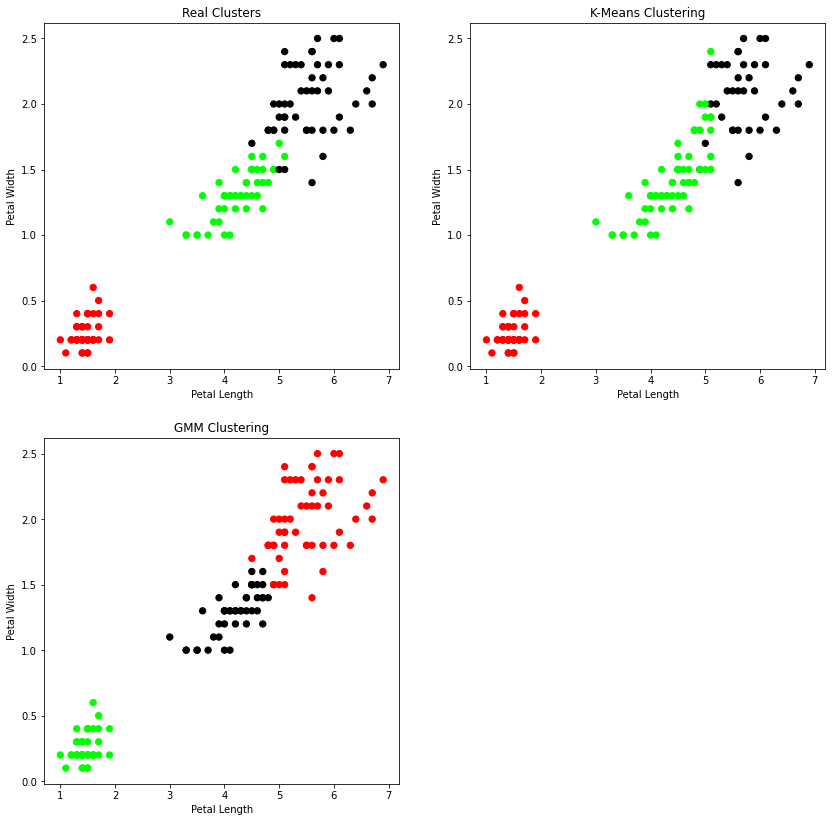

Obseravtion : The GMM using EM algorithm based clustering matched the true labels more closely than the KMeans


In [5]:
# 7.Apply EM algorithm to cluster a set of data stored in .csv file. Use the same data set for clustering

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd 
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model = KMeans(n_clusters = 3)
model.fit(X)
plt.figure(figsize=(14,14))
colormap = np.array(['red','lime','black'])
plt.subplot(2,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c= colormap[y.Targets],s =40)
plt.title('Real Clusters')
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.subplot(2,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c= colormap[model.labels_],s =40)
plt.title("K-Means Clustering")
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa,columns=X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c= colormap[gmm_y],s =40)
plt.title("GMM Clustering")
plt.xlabel('Petal Length')
plt.ylabel("Petal Width")
plt.show()
print("Obseravtion : The GMM using EM algorithm based clustering matched the true labels more closely than the KMeans")


In [6]:
# 8.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data)
x_train,X_test,Y_train,Y_test = train_test_split(iris_data,iris_labels,test_size = 0.20)
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,Y_train)
y_prd = classifier.predict(X_test)
print(confusion_matrix(Y_test,y_prd))
print(classification_report(Y_test,y_prd))


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

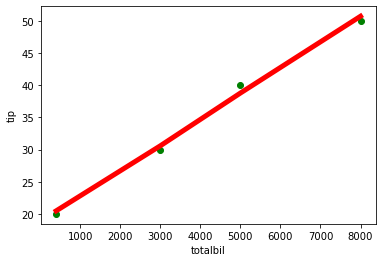

In [1]:
# 9.Implement the non-parametric Locally Weighted Regression Algorithm in order to fit the data points.Select appropriate data 
#   set for your experiment and draw graphs.
from numpy import*
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg
from scipy.stats.stats import pearsonr

def kernel(point,xmat,k):
    m,n=shape(xmat)
    weights = mat(eye((m)))
    for j in range(m):
        diff = point-X[j]
        weights[j,j] = exp(diff*diff.T/(-2.0*k**2))
        return weights
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = ((X.T*wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = shape(xmat)
    ypred = zeros(m)
    for i in range(m):
        ypred [i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
data = pd.read_csv('tips.csv')
bill = array(data.bill)
tip = array(data.tip)
mbill = mat(bill)
mtip = mat(tip)
m = shape(mbill)[1]
one = mat(ones(m))
X = hstack((one.T,mbill.T))

ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color = 'green')
ax.plot(xsort[:,1],ypred[SortIndex],color = 'red',linewidth = 5)
plt.xlabel('totalbil')
plt.ylabel('tip')
plt.show()